## NEURON

array([ 5.73522674e-06,  2.00772872e-05,  3.75105858e-06,  4.39793544e-06,
        4.29375373e-06, -3.70000000e+01,  7.51761000e-01])
soma { nseg=1  L=18.8965  Ra=100
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=18.8965}
	insert capacitance { cm=0.751761}
}


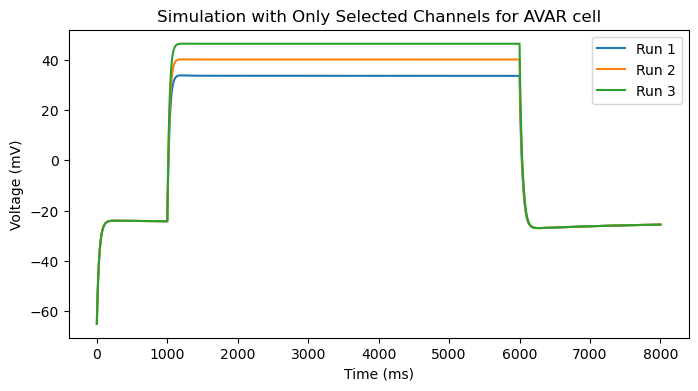

In [18]:

import sys
sys.path.append('..')  # the parent directory
from my_AVAR_simulation_iclamp import AVAR_simulation_iclamp
from g_to_Scm2 import gScm2
import pprint





surf=1121.79e-8


# CONDUCTANCES: EGL19, LEAK, IRK, NCA, UNC103, ELEAK, CM
gAVAR=[0.0643372,0.225225,0.042079,0.0493356,0.0481669,-37,0.751761]


# leak + unc103
# gAVAR = [0.0, 0.225225, 0.0, 0.0,  0.0481669,-37,0.751761]

# # leak + egl19 
# gAVAR=[0.0643372,0.225225,0.0, 0.0,0,-37,0.751761]

        
gAVAR_scaled = gScm2(gAVAR,surf,4)
pprint.pprint(gAVAR_scaled)

        


v, time1, vi_peak, vi = AVAR_simulation_iclamp(gAVAR_scaled, s1=0.015, s2=0.019, ns=3)
#s2 = 0.035
# best_cc=AIY_simulation_iclamp(gbest,-0.015,0.035,11)
# best_voltage=best_cc[0]
# best_time2=best_cc[1]
# best_VIss=best_cc[3]
# best_VIpeaks=best_cc[2]



# #Matplotlib


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))


for i in range(len(v)):
    plt.plot(time1[i], v[i], label=f'Run {i + 1}', linewidth=1.5)


plt.title('Simulation with Only Selected Channels for AVAR cell')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')


plt.legend()
plt.show()





#Plotly
# # Plotting
# import plotly.graph_objects as go

# fig = go.Figure()
# for i in range(len(v)):
#     fig.add_trace(
#         go.Scatter(
#             x=time1[i], 
#             y=v[i], 
#             mode='lines', 
#             name=f'Run {i + 1}'  # Label each run
#         )
#     )
# fig.update_layout(
#     title='Simulation with Only ___ Channel',
#     xaxis_title='Time (ms)',
#     yaxis_title='Voltage (mV)',
#     template='plotly_white' ,
#     width = 800,
#     height = 400
# )
# fig.show()


## NeuroML

In [21]:
import pandas as pd
from pyneuroml import pynml

def run_simulation_and_get_results(lems_file):
    # Run the simulation with pyNeuroML
    print(f"Running simulation: {lems_file}")
    results = pynml.run_lems_with_jneuroml(
        lems_file, 
        max_memory="1024M", 
        nogui=True, 
        plot=False, 
        load_saved_data=True
    )

    # time and variable values
    time = results["t"]
    voltage_data = {}
    for key in results:
        if key.startswith("pop_AVAR") and key.endswith("/v"):  # Filter voltage keys
            compartment = key.split("/")[1]  # Extract compartment index
            voltage_data[f"Run {compartment}"] = results[key]
    
    
    df = pd.DataFrame(voltage_data)
    df.insert(0, "Time (ms)", time)  # Add time as the first column
    return df


lems_file = "LEMS_Sim_IClamp_AVAR.xml" 
df_AVAR_NML = run_simulation_and_get_results(lems_file)
df_AVAR_NML = df_AVAR_NML * 1000 # Convert voltage from V to mV and time from s to ms
nml_time = df_AVAR_NML.iloc[:, 0]
nml_voltages = df_AVAR_NML.iloc[:, 1:4]

pyNeuroML >>> INFO - Loading LEMS file: LEMS_Sim_IClamp_AVAR.xml and running with jNeuroML
pyNeuroML >>> INFO - Executing: (java -Xmx1024M  -Djava.awt.headless=true -jar  "/Users/dakosh/mambaforge/lib/python3.10/site-packages/pyneuroml/utils/./../lib/jNeuroML-0.13.3-jar-with-dependencies.jar"  LEMS_Sim_IClamp_AVAR.xml  -nogui -I '') in directory: .


Running simulation: LEMS_Sim_IClamp_AVAR.xml


pyNeuroML >>> INFO - Command completed successfully!


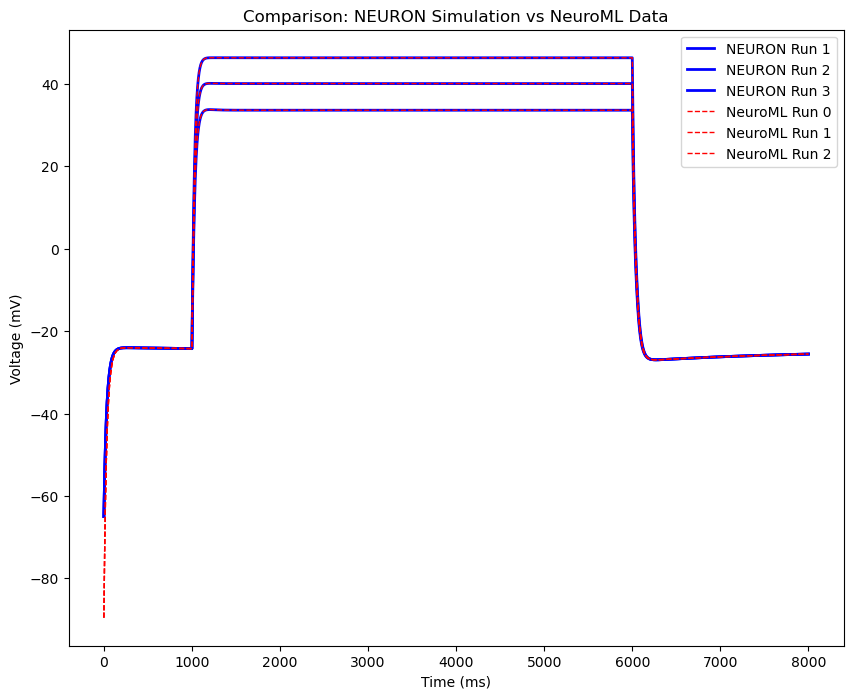

In [22]:
#matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# NEURON simulation data
for i in range(len(v)):
    plt.plot(time1[i], v[i], label=f'NEURON Run {i + 1}', linewidth=2, color='blue')

# NeuroML data
for col in nml_voltages.columns:
    plt.plot(nml_time, df_AVAR_NML[col], label=f'NeuroML {col}', linewidth=1, color='red', linestyle='--')


plt.title('Comparison: NEURON Simulation vs NeuroML Data')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')

plt.legend(loc='upper right')

plt.show()


In [ ]:
# # PLOTLY
# import plotly.graph_objects as go

# # # Create the Plotly figure
# fig = go.Figure()

# # Add NEURON simulation data to the plot
# fig = go.Figure()

# for i in range(len(v)):
#     fig.add_trace(
#         go.Scatter(
#             x=time1[i], 
#             y=v[i], 
#             mode='lines', 
#             name=f'NEURON Run {i + 1}', # Label each run
#             line = dict(color = 'blue', width = 2)
#         )
#     )



# # Add NeuroML data to the plot
# for col in nml_voltages.columns:
#     fig.add_trace(
#         go.Scatter(
#             x=nml_time,  # Time from NeuroML data
#             y=df_AVAR_NML[col],  # Voltage from NeuroML data
#             mode='lines',
#             name=f'NeuroML {col}',  # Label for each trace
#             line=dict(color='red', dash='dash', width=1)
#         )
#     )

# # Update layout for clarity
# fig.update_layout(
#     title='Comparison: NEURON Simulation vs NeuroML Data',
#     xaxis_title='Time (ms)',
#     yaxis_title='Voltage (mV)',
#     template='plotly_white',
#     legend=dict(x=0.99, y=0.99),  # Adjust legend position
#     height=600,  
#     width=800   
# )

# # Show the plot
# fig.show()